In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

## Project 2A: MNIST

In this assignment, you will be working with MNIST dataset to train a handwriting digit classifier.

<img src="mnistExamples.png">

### Part I: kNN classifiers for MNIST 

You will train kNN classifiers for multiple values of $k$ and then choose the classifer with the lowest validation error as your final classifier.

In [49]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
mnist = fetch_openml('mnist_784', version=1)
X_digits, Y_digits = shuffle(mnist.data, mnist.target) # shuffle dataset (which is ordered!)

# choose only 5000  
# X_digits = X_digits[-5000:,:] 
# Y_digits = Y_digits[-5000:]

print(mnist.data.shape)
print(X_digits.shape, Y_digits.shape)

(70000, 784)
(70000, 784) (70000,)


(784,)
8


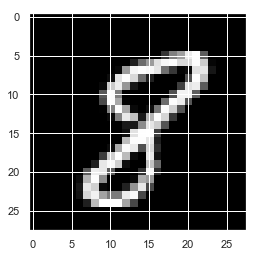

In [50]:
print(X_digits[0,:].shape)
print(Y_digits[0])
plt.imshow(np.reshape(X_digits[0,:],(28,28)),cmap='gray')

#### 1. Prepare the train/validate/test data.
First step, split the dataset into 60% training data, 20% validation data, and 20% test data

In [51]:
from sklearn.model_selection import train_test_split


X_tv, X_test, Y_tv, Y_test = train_test_split(
    X_digits, Y_digits, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_tv, Y_tv, test_size=0.2, random_state=0)


In [52]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(44800, 784)
(14000, 784)
(11200, 784)


#### 2. Train kNN classifiers
For each value of $k \in [2,20]$, train a kNN classifier with Euclidean distance (L1). Plot out validation error for $k$. **Plot out the validation error for each value of k.** 

In [53]:
from sklearn import neighbors

errors = []
krange = np.arange(2,21)
for k in krange:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    errors.append(sum(clf.predict(X_val) != Y_val)/float(len(Y_val)))

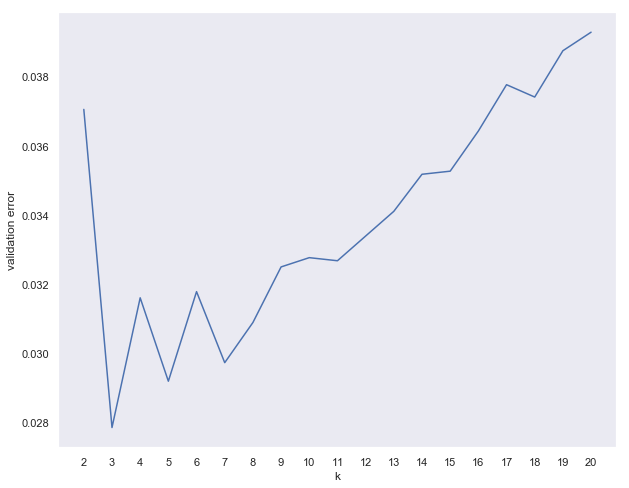

In [54]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.plot(krange,errors)
ax.set_xticks(krange)
ax.set_xlabel('k')
ax.set_ylabel('validation error')
ax.grid()
#ax.set_xlim(220,280)

From the plot, we choose k = 3

In [55]:
k = 3
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

error_rate = sum(clf.predict(X_test) != Y_test)/float(len(Y_test))
print("error rate = %f" % error_rate)

error rate = 0.029571


#### 3. Test and analyze 
Choose the classifier with lowest validation error from previous part. Calculate the **confusion matrix**, along with the test accuracy and, for each class, test precision/recall as shown in the example below. You don't have to match the output exactly but you need to show same amount of information 

<img width="400px" src="mnist_conf_mat.png">


In [56]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

In [57]:
from sklearn import metrics

report = metrics.classification_report(Y_test, predictions, output_dict=True)
# report = classification_report(Y_test, predictions, output_dict=True)

In [58]:
df = pd.DataFrame(report)
df.drop(["f1-score", "support"], inplace=True ,axis=0)
df.drop(["micro avg", "macro avg", "weighted avg"], axis=1, inplace=True)

df = (df*100)
df = df.astype(int)

df

,0,1,2,3,4,5,6,7,8,9
precision,97,95,98,95,98,96,97,96,98,94
recall,99,99,95,97,96,95,98,96,92,95


In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, Y_train)
dt_ypred = dt.predict(X_test)

Text(0.5, 1.0, 'Confusion Metrix')

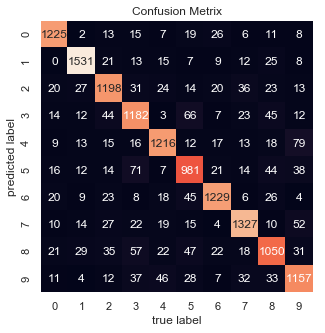

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(predictions, dt_ypred)
fig, ax = plt.subplots(1,1, figsize=(5,5))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Metrix')

IndexError: list index out of range

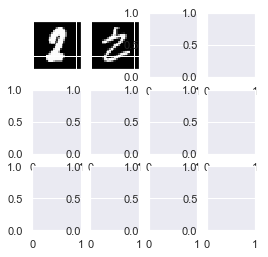

In [61]:
lt = []
limit = 12
indx = 0
while(limit > 0 and indx < len(X_test)):
    if (Y_test[indx] == '2' and predictions[indx] == '8'):
        lt.append(X_test[indx])
        limit -= 1
        indx += 1
    indx += 1

len(lt)
fig,ax = plt.subplots (3,4, figsize=(4,4))
indx = 0
for row in range(3):
    for col in range(4):
        ax[row][col].imshow(np.reshape(lt[indx],(28,28)),cmap='gray')
        ax[row][col].set_yticklabels([])
        ax[row][col].set_xticklabels([])
        
        indx+= 1
fig.suptitle('2 misclassified as 8', fontsize=12)

Also, show example images of **mistakes** your classifier made.

<img width="200px" src="mistakes.png">



### Part II: Logistic Regression, Decision Tree, Perceptron and SVM 

In this part, we consider a binary classification problem, "odd vs even". You will train a **logistic regression classifier**, a **decision tree**, a **perceptron** and a **SVM** that predicts "even" or "odd" given an instance from MNIST dataset.

#### 1. Prepare the training data and train the classifier

#### 2. Test your classifiers

For each classifier, calculate the **confusion matrix**, along with the **test accuracy/precision/recall/f1-score** of your classifier. You only need to do this for 1 test set.


#### 3. Selected mistakes
Display some examples of mistakes made by each of your classifiers.

#### 4. Cross validation

Perform cross validation on each classifier and report the average accuracy and its standard deviation. Use a boxplot to compare different classifiers.